In [40]:
import numpy as np
import epilib as ep
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [82]:
hic_ground = ep.get_contactmap("ground_truth/contacts.txt")
hic_smatrix = ep.get_contactmap("data")

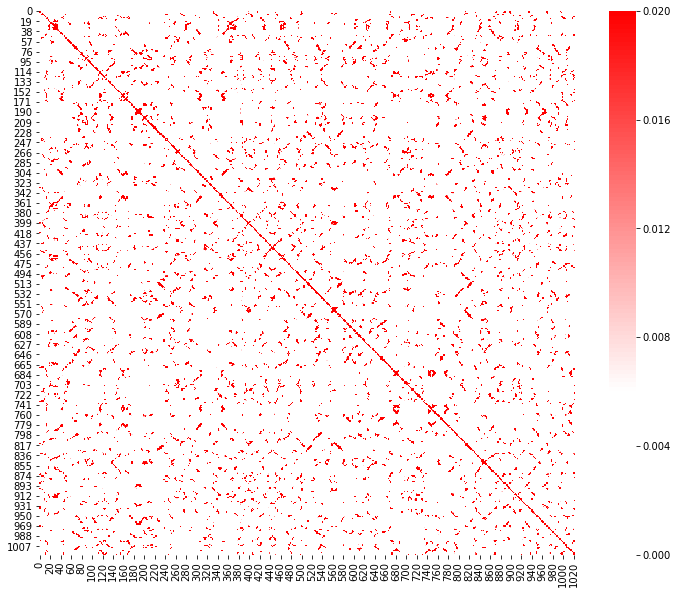

In [81]:
ep.plot_contact(hic)

In [77]:
def get_smatrix():
    with open("config.json") as f:
        config = json.load(f)

        nspecies = config['nspecies']

        letters = 'ABCDE'

        chi = np.zeros((nspecies, nspecies))
        for i in range(nspecies):
            for j in range(nspecies):
                if j >= i:
                    chi[i,j] = config["chi" + letters[i] + letters[j]]
                    chi[j,i] = config["chi" + letters[i] + letters[j]]

        seqs = []
        for file in config["chipseq_files"]:
            seqs.append( np.loadtxt(file) )
        seqs = np.array(seqs)
    

    smatrix = seqs.T @ chi @ seqs
    
    return smatrix

In [78]:
smatrix = get_smatrix()

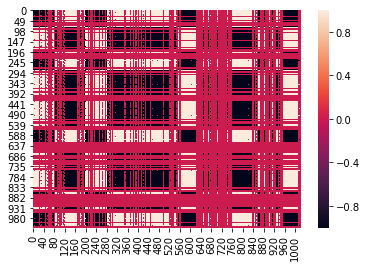

In [79]:
sns.heatmap(smatrix)

In [44]:
np.savetxt("smatrix.txt", smatrix, fmt="%d")